# L.3 Clustering 🐍

In [7]:
# Include numpy and link instance to variable np
import numpy as np

# Include library and link instance to plt
import matplotlib.pyplot as plt

# Scikit learn for data set and other methods
from sklearn import datasets

<ipython-input-12-b78245d022b2>:2: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  a = plt.imread("https://github.com/lnxdxC/DSAI/blob/main/L03_Clustering/clustering.PNG?raw=true");


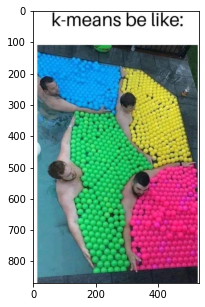

In [12]:
fig, ax = plt.subplots(figsize=(10,5)) 
a = plt.imread("https://github.com/lnxdxC/DSAI/blob/main/L03_Clustering/clustering.PNG?raw=true");
ax.imshow(a);

## 3.1 Manual clustering

1. Determine the distances for each point to the given centroids
2. Assign the nearest centroid as class
3. Determine centroid for a given class
4. Repeat

### 3.1.1 Create data set

In [ ]:
iris = datasets.load_iris()
x_iris = iris.data[:, :2]
y_iris = iris.target

### 3.1.2 Tools

### 3.1.3 Initial assumptions

### 3.1.4 Manuel k-means clustering

## 3.12 scikit-learn 
[Scikit-Learn](https://scikit-learn.org/stable/user_guide.html) is widely used library for machine learning. Especially Classification, regression and clustering

![](https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

We recommend this [Examples](https://scikit-learn.org/stable/auto_examples/index.html)

In [ ]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets
np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1, init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']

for name, est in estimators:
    fig = plt.figure(fignum, figsize=(6, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(6, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(), X[y == label, 0].mean(), X[y == label, 2].mean() + 2, name, horizontalalignment='center', bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

# Reorde the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()